In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
cars = pd.read_csv("used-cars-database/autos.csv",encoding='latin1')

In [3]:
print(len(cars))
cars.head()

371528


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
cars = cars.dropna()
print(len(cars))
cars.isnull().sum()

260956


dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

Dropping the columns abtest,noofpictures,offertype, datecrawled,Seller,name
Reason: 
abtest,noofpictures values are same for all

offertype : as there are only two types Angepbot(Offer) which is the majority and Guesh(Request) is only handful so this would not effect the output 

datecrawled : just gives when the system got the data

Seller : has two types private and commercial which willnot effect the price it doesnot matter who sells the vehicle

name : as the columns model and brand already has this info

postalcode : as we cannot directly determine it based on postal code


In [5]:
cars = cars.iloc[:,[3,6,7,8,9,10,11,12,13,14,15,4]]
cars.columns

Index(['offerType', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'price'],
      dtype='object')

In [6]:
print('Vehicle Type: ',cars.vehicleType.unique())
print('Gearbox: ',cars.gearbox.unique())
print('Fuel Type: ',cars.fuelType.unique())
print('Repaired Damage: ',cars.notRepairedDamage.unique())

Vehicle Type:  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
Gearbox:  ['manuell' 'automatik']
Fuel Type:  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Repaired Damage:  ['nein' 'ja']


In [7]:
cars.replace({'gearbox':{'manuell':'manual','automatik':'automatic'}},inplace=True)
cars.replace({'vehicleType':{'kleinwagen':'small_car','kombi':'combi','andere':'Others'}},inplace=True)
cars.replace({'fuelType':{'benzin':'petrol','andere':'others','elektro':'electro'}},inplace=True)
cars.replace({'notRepairedDamage':{'nein':'no','ja':'yes'}},inplace=True)

In [8]:
cars.head(10)

,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
3,Angebot,small_car,2001,manual,75,golf,150000,6,petrol,volkswagen,no,1500
4,Angebot,small_car,2008,manual,69,fabia,90000,7,diesel,skoda,no,3600
5,Angebot,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes,650
6,Angebot,cabrio,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2200
7,Angebot,limousine,1980,manual,50,andere,40000,7,petrol,volkswagen,no,0
10,Angebot,limousine,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,2000
11,Angebot,combi,2005,manual,140,passat,150000,12,diesel,volkswagen,yes,2799
14,Angebot,suv,2011,manual,190,navara,70000,3,diesel,nissan,no,17999
17,Angebot,small_car,2004,automatic,75,twingo,150000,2,petrol,renault,no,1750
18,Angebot,bus,2007,manual,136,c_max,150000,6,diesel,ford,no,7550


In [9]:
#sns.pairplot(cars[['powerPS']])
#cars[['powerPS']].plot.kde(xlim=(0,1000))
#sns.kdeplot(cars.loc[(cars.kilometer>1000)&(cars.kilometer<20000)].kilometer, shade=True)
#cars.kilometer.max()
#cars.loc[(cars.price>400)&(cars.price<200000)].max()

In [10]:
cars = cars.loc[(cars.price>400)&(cars.price<=40000)]
cars = cars.loc[(cars.yearOfRegistration>1990)&(cars.yearOfRegistration<=2018)]
cars = cars.loc[(cars.monthOfRegistration>0)&(cars.monthOfRegistration<=12)]
cars = cars.loc[(cars.powerPS>10)]
cars = cars.loc[(cars.kilometer>1000)&(cars.kilometer<=150000)]
cars = cars.loc[(cars.offerType=='Angebot')]

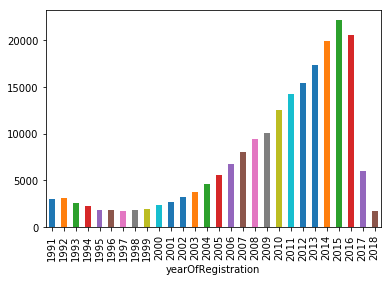

In [11]:
groups  = cars.groupby('yearOfRegistration')['price'].mean()
groups.plot.bar()

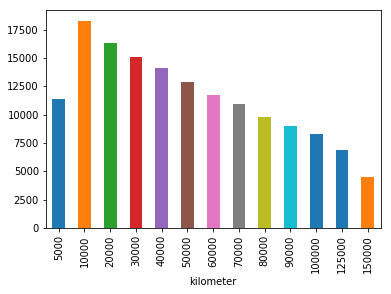

In [12]:
groups  = cars.groupby('kilometer')['price'].mean()
groups.plot.bar()

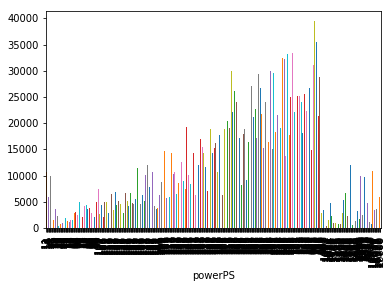

In [13]:
groups  = cars.groupby('powerPS')['price'].mean()
groups.plot.bar()

In [14]:
Date_reg =(cars.yearOfRegistration*100)+cars.monthOfRegistration
cars['Date_reg']=Date_reg
cars.drop(['yearOfRegistration', 'monthOfRegistration','offerType'],inplace=True, axis=1)
cars.head(10)

,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,price,Date_reg
3,small_car,manual,75,golf,150000,petrol,volkswagen,no,1500,200106
4,small_car,manual,69,fabia,90000,diesel,skoda,no,3600,200807
5,limousine,manual,102,3er,150000,petrol,bmw,yes,650,199510
6,cabrio,manual,109,2_reihe,150000,petrol,peugeot,no,2200,200408
10,limousine,manual,105,3_reihe,150000,petrol,mazda,no,2000,200412
11,combi,manual,140,passat,150000,diesel,volkswagen,yes,2799,200512
14,suv,manual,190,navara,70000,diesel,nissan,no,17999,201103
17,small_car,automatic,75,twingo,150000,petrol,renault,no,1750,200402
18,bus,manual,136,c_max,150000,diesel,ford,no,7550,200706
19,bus,manual,102,a_klasse,150000,petrol,mercedes_benz,no,1850,200401


In [15]:
cars=pd.get_dummies(data=cars,columns=['notRepairedDamage','vehicleType','model','brand','gearbox','fuelType'],drop_first=True)
cars.head(10)


,powerPS,kilometer,price,Date_reg,notRepairedDamage_yes,vehicleType_bus,vehicleType_cabrio,vehicleType_combi,vehicleType_coupe,vehicleType_limousine,...,brand_trabant,brand_volkswagen,brand_volvo,gearbox_manual,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_others,fuelType_petrol
3,75,150000,1500,200106,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,69,90000,3600,200807,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,102,150000,650,199510,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
6,109,150000,2200,200408,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10,105,150000,2000,200412,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
11,140,150000,2799,200512,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
14,190,70000,17999,201103,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
17,75,150000,1750,200402,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,136,150000,7550,200706,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19,102,150000,1850,200401,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


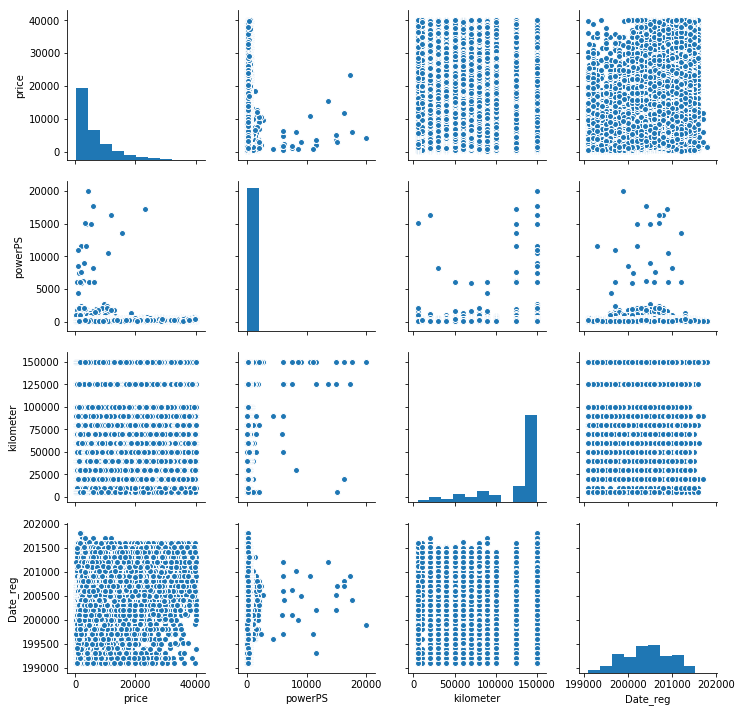

In [16]:
sns.pairplot(cars[['price','powerPS','kilometer','Date_reg']])


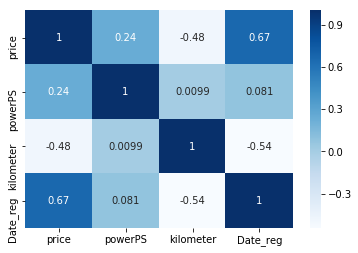

In [17]:
sns.heatmap(cars[['price','powerPS','kilometer','Date_reg']].corr(),cmap = 'Blues', annot=True)


In [18]:
y = cars.price
X = cars.drop('price',axis=1)


In [19]:
X.head(5)


,powerPS,kilometer,Date_reg,notRepairedDamage_yes,vehicleType_bus,vehicleType_cabrio,vehicleType_combi,vehicleType_coupe,vehicleType_limousine,vehicleType_small_car,...,brand_trabant,brand_volkswagen,brand_volvo,gearbox_manual,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_others,fuelType_petrol
3,75,150000,200106,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,69,90000,200807,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
5,102,150000,199510,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
6,109,150000,200408,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10,105,150000,200412,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
y.head(5)


3     1500
4     3600
5      650
6     2200
10    2000
Name: price, dtype: int64

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [22]:
list(zip(X_train.columns.get_values(), linreg.coef_))


[('powerPS', 2.497540364542403),
 ('kilometer', -0.04151694537404538),
 ('Date_reg', 6.683028960481991),
 ('notRepairedDamage_yes', -1553.9217606297725),
 ('vehicleType_bus', 233.32388843434182),
 ('vehicleType_cabrio', 2433.7146048595587),
 ('vehicleType_combi', 3.4845643883527373),
 ('vehicleType_coupe', 2060.8960705674644),
 ('vehicleType_limousine', 235.9311698052461),
 ('vehicleType_small_car', 98.23534591346288),
 ('vehicleType_suv', 1972.9741777083937),
 ('model_145', 4736.947847514064),
 ('model_147', 1919.0778485009341),
 ('model_156', 3083.2800128122008),
 ('model_159', 3915.467012098249),
 ('model_1_reihe', 1819.249413189727),
 ('model_1er', -5953.2130932475175),
 ('model_2_reihe', 1176.096096463954),
 ('model_300c', 6734.118512615935),
 ('model_3_reihe', 2770.6240065306147),
 ('model_3er', -5536.983450098205),
 ('model_4_reihe', 2929.8055753635863),
 ('model_500', -603.9179297714509),
 ('model_5_reihe', 3619.9869225199036),
 ('model_5er', -4323.414234793964),
 ('model_601',

In [23]:
print (linreg.intercept_)


-1332398.0236719574


In [24]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


3299.2362650325817

In [25]:
#Predicting the test set results
y_pred = linreg.predict(X_test)
print(linreg.score(X_test, y_test)*100,'% Prediction Accuracy')

76.12552157991426 % Prediction Accuracy


Text(0,0.5,'Predicted Y')

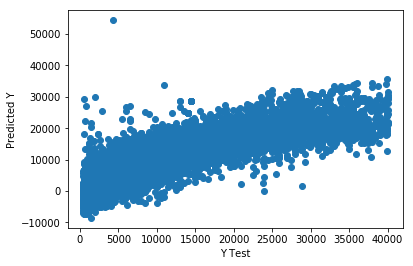

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [28]:
# steps
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)
# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}
# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters,n_jobs=4)
# Fit to the training set
cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'ridge__alpha': array([1.00000e-04, 1.20679e-04, 1.45635e-04, 1.75751e-04, 2.12095e-04,
       2.55955e-04, 3.08884e-04, 3.72759e-04, 4.49843e-04, 5.42868e-04,
       6.55129e-04, 7.90604e-04, 9.54095e-04, 1.15140e-03, 1.38950e-03,
       1.67683e-03, 2.02359e-03, 2.44205e-03, 2.94705e-0... 3.23746e-01, 3.90694e-01,
       4.71487e-01, 5.68987e-01, 6.86649e-01, 8.28643e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
#Predicting the test set results
y_pred_train=cv.predict(X_train)
y_pred_test=cv.predict(X_test)
print(cv.score(X_test, y_test)*100,'% Prediction Accuracy')

76.12555349064921 % Prediction Accuracy


In [31]:
# rmse on train set
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3310.7236925838515
